In [2]:
import pandas as pd
import numpy as np

In [13]:
dataset = pd.read_csv("Crop_recommendation.csv")
X = dataset.iloc[:,0:3].values
print(X)

[[ 90  42  43]
 [ 85  58  41]
 [ 60  55  44]
 ...
 [118  33  30]
 [117  32  34]
 [104  18  30]]


In [4]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [34]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

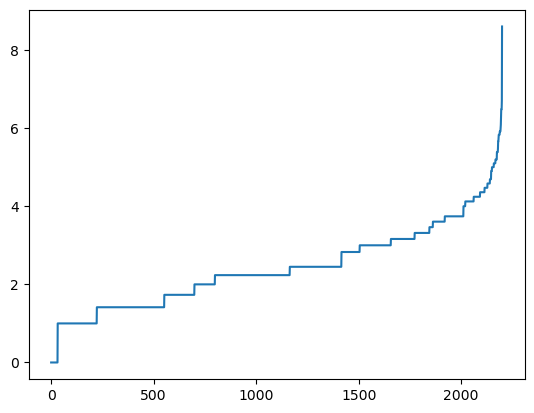

In [35]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [68]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=4)

In [69]:
model = dbscan.fit(X)
labels = model.labels_ 
#print(X)

In [70]:
#print(labels)

In [71]:
from sklearn import metrics

In [72]:
sample_cores = np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_] = True
#print(sample_cores)

In [73]:
n_clusters = len(set(labels))- (1 if -1 in labels else 0)
print(n_clusters)

1


In [67]:
print(metrics.silhouette_score(X,labels))

-0.5873063605362863


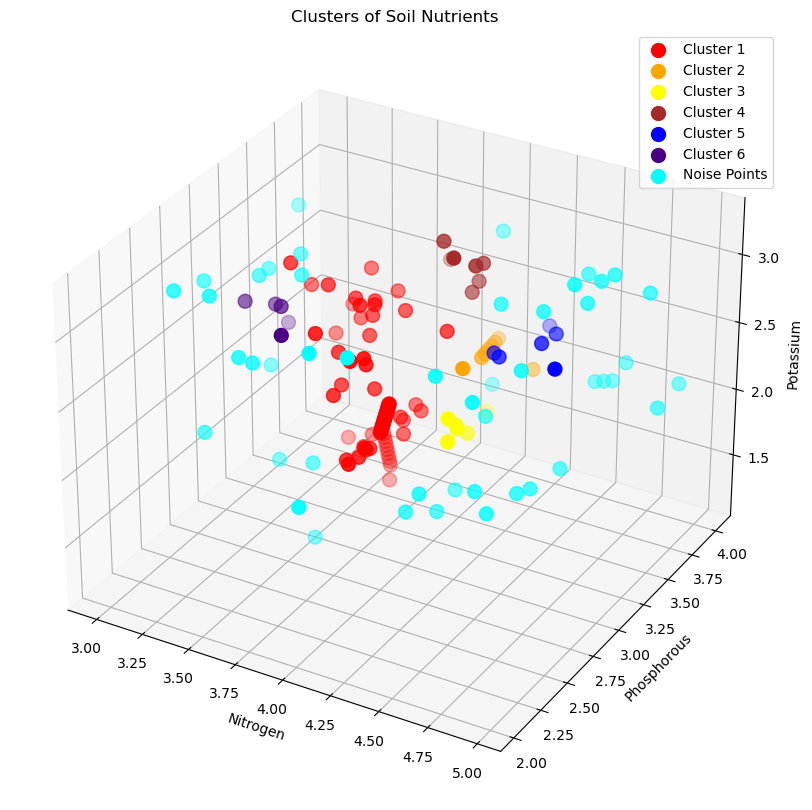

In [13]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[labels==0, 0], X[labels==0, 1], X[labels==0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X[labels==1, 0], X[labels==1, 1], X[labels==1, 2], s=100, c='orange', label='Cluster 2')
ax.scatter(X[labels==2, 0], X[labels==2, 1], X[labels==2, 2], s=100, c='yellow', label='Cluster 3')
ax.scatter(X[labels==3, 0], X[labels==3, 1], X[labels==3, 2], s=100, c='brown', label='Cluster 4')
ax.scatter(X[labels==4, 0], X[labels==4, 1], X[labels==4, 2], s=100, c='blue', label='Cluster 5')
ax.scatter(X[labels==5, 0], X[labels==5, 1], X[labels==5, 2], s=100, c='indigo', label='Cluster 6')
#ax.scatter(X[labels==6, 0], X[labels==6, 1], X[labels==6, 2], s=100, c='darkgreen', label='Cluster 7')
ax.scatter(X[labels==-1, 0], X[labels==-1, 1], X[labels==-1, 2], s=100, c='cyan', label='Noise Points')

#ax.scatter(DBSCAN.cluster_centers_[:, 0], DBSCAN.cluster_centers_[:, 1], DBSCAN.cluster_centers_[:, 2], s=200, c='cyan', label='Centroids')
ax.set_title('Clusters of Soil Nutrients')
ax.set_xlabel('Nitrogen')
ax.set_ylabel('Phosphorous')
ax.set_zlabel('Potassium')
plt.legend()
plt.show()